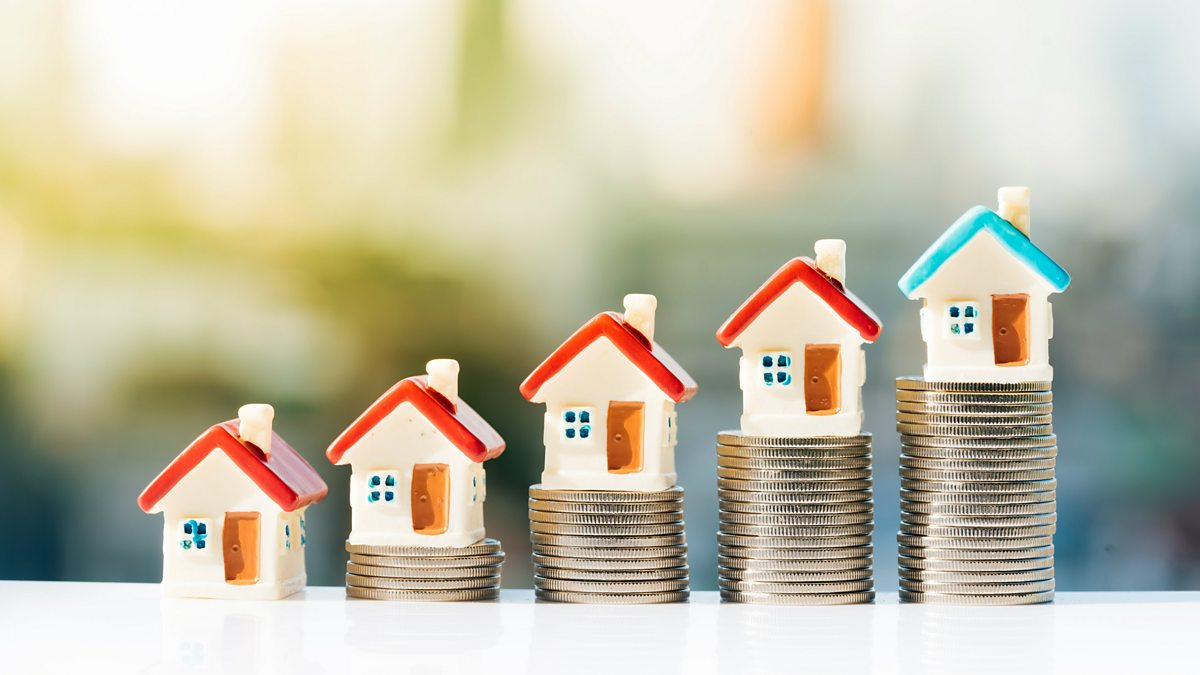

**HOUSE PRICE PREDICTION**


A house price prediction model is a machine learning or statistical model designed to estimate the market value or selling price of residential properties (houses) based on a set of input features or attributes. These models are commonly used in real estate, finance, and related industries to assist in property valuation and decision-making.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
df.total_bedrooms

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

**DATA CLEANING**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**DATA ANALYSIS**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

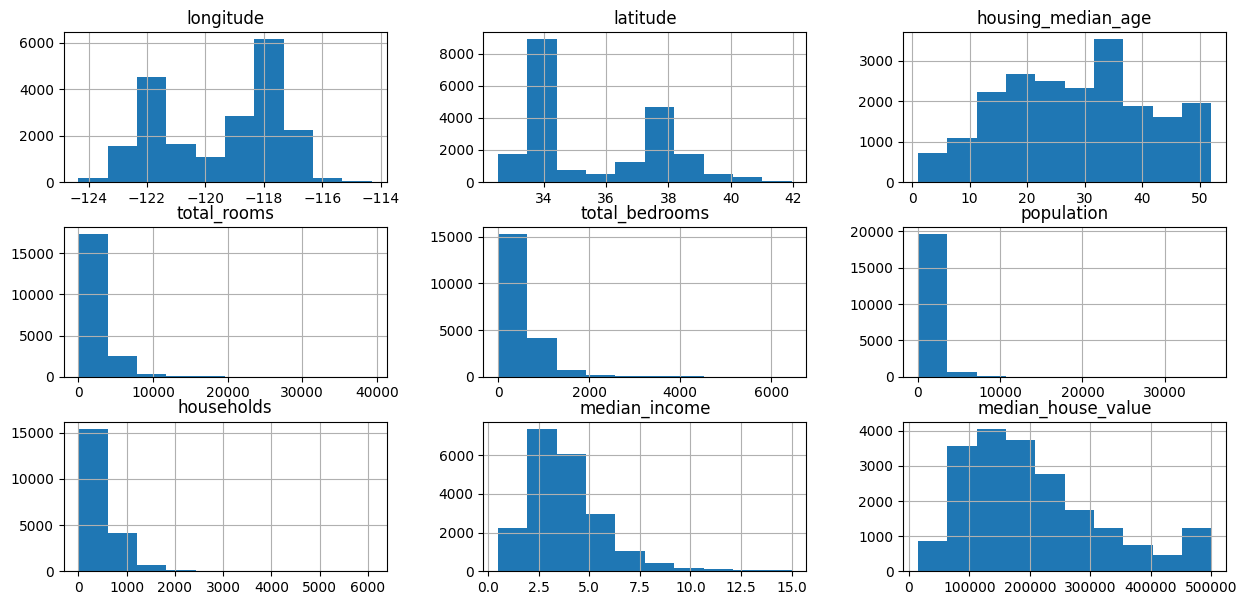

In [ ]:
df.hist(figsize=(15, 7))

In [ ]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_ratio,household_rooms
longitude,1.000000,-0.925221,-0.101576,0.025342,0.057803,0.107023,0.053550,-0.021584,-0.285999,-0.049075,0.100180,-0.071666
latitude,-0.925221,1.000000,0.005998,-0.028166,-0.065379,-0.133398,-0.085227,-0.073399,0.197707,-0.140318,-0.116390,0.145169
housing_median_age,-0.101576,0.005998,1.000000,-0.312985,-0.270253,-0.241392,-0.240421,-0.118679,0.111427,0.103897,-0.028857,-0.044463
total_rooms,0.025342,-0.028166,-0.312985,1.000000,0.944948,0.863666,0.931534,0.210279,-0.011366,0.161377,0.402632,-0.368827
total_bedrooms,0.057803,-0.065379,-0.270253,0.944948,1.000000,0.897455,0.975290,-0.024174,-0.010652,0.055140,0.671549,-0.553987
population,0.107023,-0.133398,-0.241392,0.863666,0.897455,1.000000,0.931280,-0.003235,-0.075490,-0.022202,0.570511,-0.625257
households,0.053550,-0.085227,-0.240421,0.931534,0.975290,0.931280,1.000000,0.005464,-0.013859,0.074211,0.632952,-0.657681
median_income,-0.021584,-0.073399,-0.118679,0.210279,-0.024174,-0.003235,0.005464,1.000000,-0.016765,0.686948,-0.515712,0.344417
ocean_proximity,-0.285999,0.197707,0.111427,-0.011366,-0.010652,-0.075490,-0.013859,-0.016765,1.000000,0.079079,-0.005989,0.007935
median_house_value,-0.049075,-0.140318,0.103897,0.161377,0.055140,-0.022202,0.074211,0.686948,0.079079,1.000000,-0.199475,0.117031


In [ ]:
df['total_rooms'] = np.log(df['total_rooms'] + 1)
df['total_bedrooms'] = np.log(df['total_bedrooms'] + 1)
df['population'] = np.log(df['population'] + 1)
df['households'] = np.log(df['households'] + 1)

RESHAPING REQUIRED VALUES INTO PROPER BELL CURVE


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

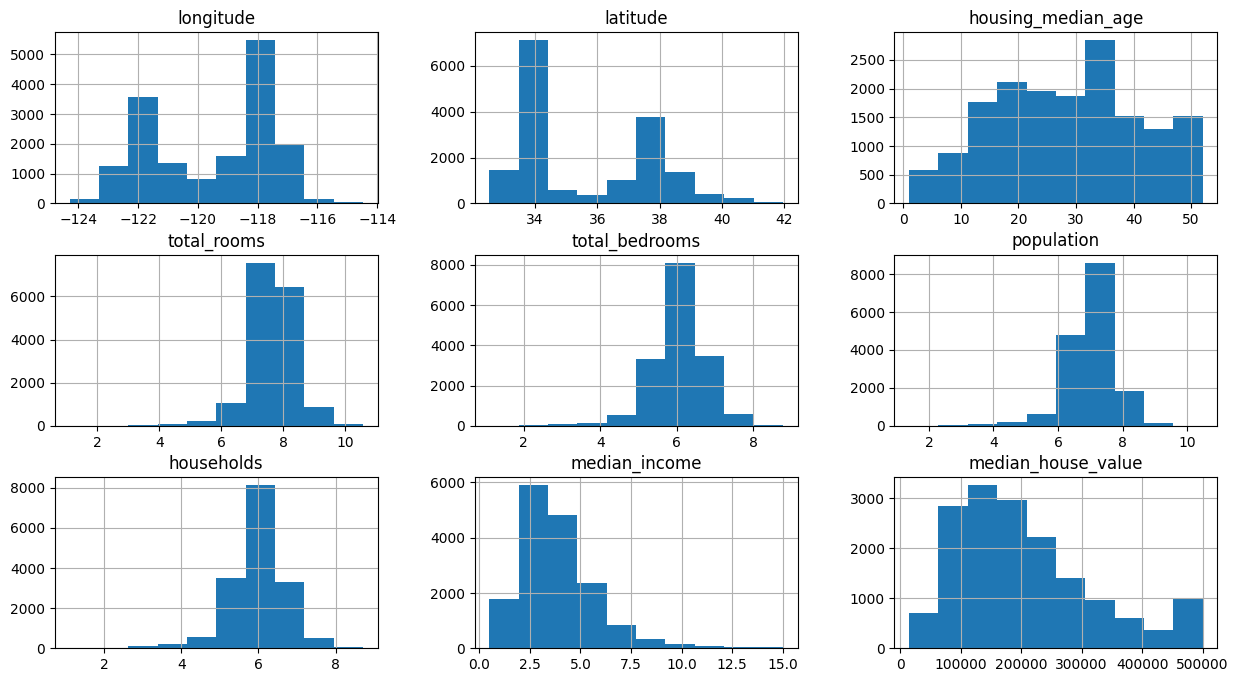

In [ ]:
df.hist(figsize=(15, 8))

In [ ]:
df.ocean_proximity.value_counts()

<1H OCEAN     7225
INLAND        5174
NEAR OCEAN    2133
NEAR BAY      1810
ISLAND           4
Name: ocean_proximity, dtype: int64

**LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity']).reshape(-1,1)


In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11555,-117.98,33.74,16.0,8.441823,6.812345,7.758761,6.716595,4.4261,0,304700.0
9405,-122.53,37.87,20.0,7.503841,5.645447,6.490724,5.537334,7.9977,3,400000.0
898,-121.96,37.53,18.0,7.773174,6.481577,7.133296,6.375025,2.6198,0,235900.0
15927,-122.42,37.73,46.0,7.506592,6.021023,7.336286,6.008813,4.0132,3,229400.0
9812,-121.93,36.60,33.0,8.147867,6.527958,7.441320,6.498282,4.0154,4,225700.0
...,...,...,...,...,...,...,...,...,...,...
10994,-117.82,33.73,24.0,6.740519,5.252273,6.180017,5.252273,4.7039,0,225000.0
18266,-122.07,37.37,30.0,7.985484,6.011267,7.001246,6.011267,7.9813,3,473500.0
12788,-121.44,38.62,37.0,7.382746,5.955837,6.880384,5.872118,1.9107,1,64700.0
189,-122.24,37.79,47.0,7.224753,5.981414,7.121252,5.717028,2.1250,3,95500.0


CORRELATION MATRIX

<Axes: >

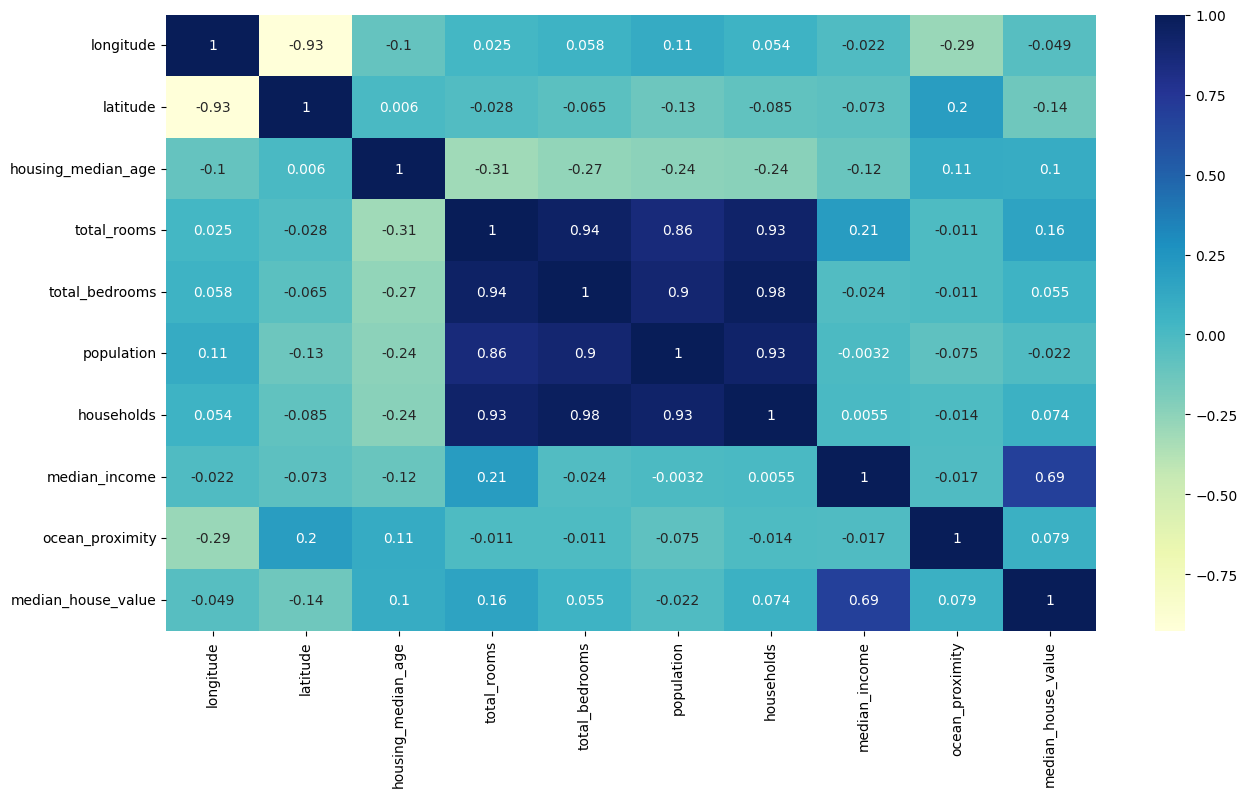

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot= True, cmap="YlGnBu")

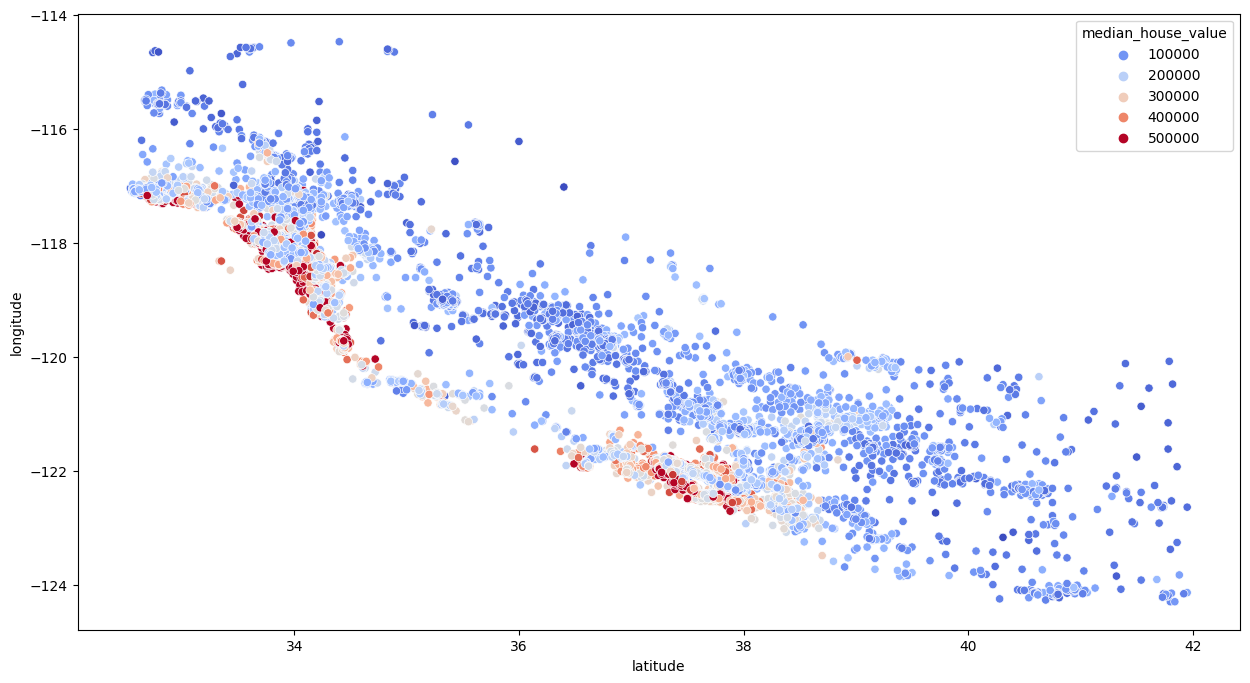

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=df, hue="median_house_value" , palette="coolwarm")
plt.show()
# blue indicates near to the ocean, red indicates close to the land

**IMPROVED VERSION OF CORRELATION MATRIX(HEATMAP)**

In [ ]:
df['bedroom_ratio'] = df['total_bedrooms'] / df['total_rooms']
df['household_rooms'] = df['total_rooms'] / df['households']

<Axes: >

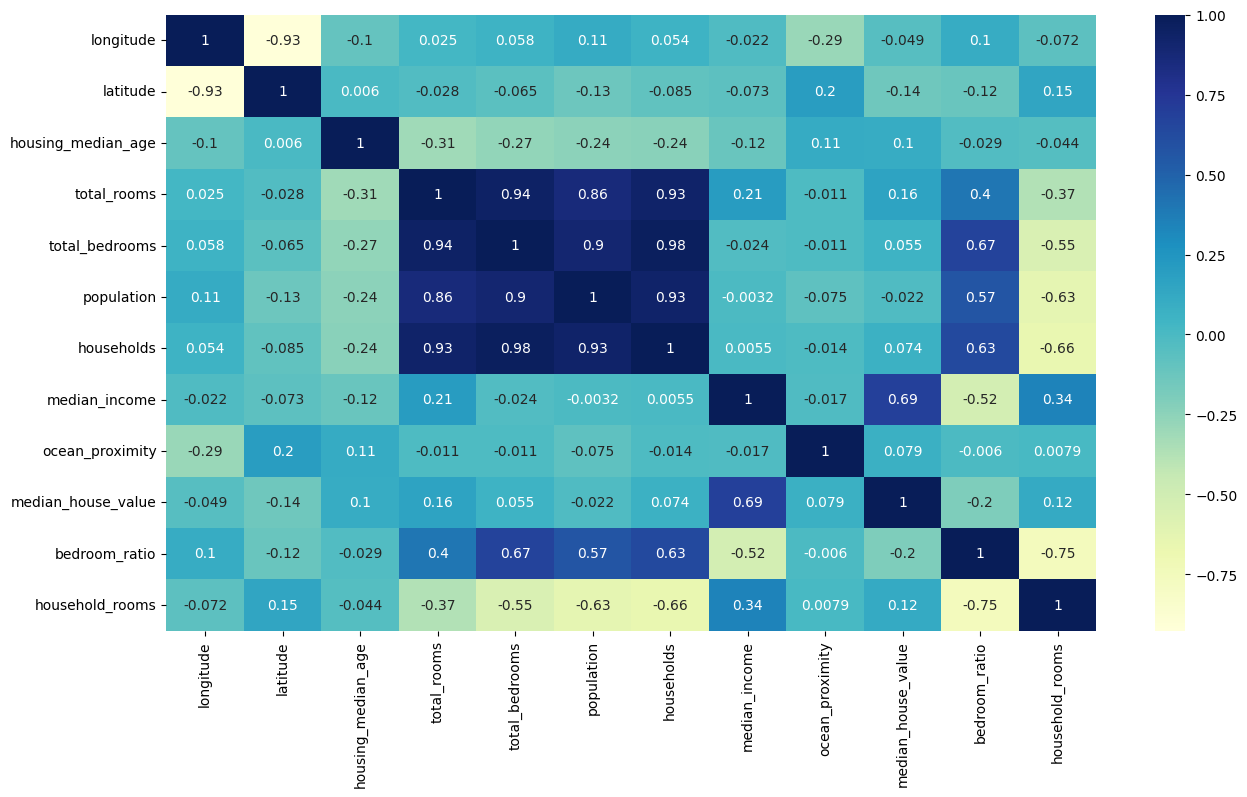

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot= True, cmap="YlGnBu")

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_ratio,household_rooms
11555,-117.98,33.74,16.0,8.441823,6.812345,7.758761,6.716595,4.4261,0,304700.0,0.806976,1.256861
9405,-122.53,37.87,20.0,7.503841,5.645447,6.490724,5.537334,7.9977,3,400000.0,0.752341,1.355136
898,-121.96,37.53,18.0,7.773174,6.481577,7.133296,6.375025,2.6198,0,235900.0,0.833839,1.219317
15927,-122.42,37.73,46.0,7.506592,6.021023,7.336286,6.008813,4.0132,3,229400.0,0.802098,1.249264
9812,-121.93,36.60,33.0,8.147867,6.527958,7.441320,6.498282,4.0154,4,225700.0,0.801186,1.253849
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,-117.82,33.73,24.0,6.740519,5.252273,6.180017,5.252273,4.7039,0,225000.0,0.779209,1.283353
18266,-122.07,37.37,30.0,7.985484,6.011267,7.001246,6.011267,7.9813,3,473500.0,0.752774,1.328419
12788,-121.44,38.62,37.0,7.382746,5.955837,6.880384,5.872118,1.9107,1,64700.0,0.806724,1.257254
189,-122.24,37.79,47.0,7.224753,5.981414,7.121252,5.717028,2.1250,3,95500.0,0.827906,1.263725


**MODEL SELECTION**

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [ ]:
test_data = X_test.join(y_test)

In [ ]:
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity))

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [ ]:
lr = LinearRegression()
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())
# model.fit(X_train, y_train)

[0.67881285 0.66071309 0.66914781 0.6536624  0.64904637]
0.6622765041479248


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
cv = cross_val_score(dtr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.62887585 0.60375546 0.60691046 0.61443419 0.57097712]
0.6049906146242614


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth = 5)
cv = cross_val_score(rfr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.68686686 0.65060185 0.66374638 0.64745011 0.63457822]
0.6566486846762083


In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')
cv = cross_val_score(svr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[-0.04764983 -0.05181831 -0.04439257 -0.06336381 -0.05606422]
-0.05265775023266115


In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
predictions = {'actual_y':y_test,'predicted_y':y_pred}
predictions

{'actual_y': 18538    242400.0
 8703     309700.0
 2062      92800.0
 17844    367900.0
 6348      67500.0
            ...   
 11354    160000.0
 16195    107600.0
 5103     120000.0
 4110     483800.0
 17135    417800.0
 Name: median_house_value, Length: 3270, dtype: float64,
 'predicted_y': array([237447.75823063, 320706.00855758, 147748.54629485, ...,
        203026.85836405, 356860.74106662, 357778.43507095])}

COMPARSION GRAPH BETWEEN THE ACTUAL AND PREDICTED VALUES

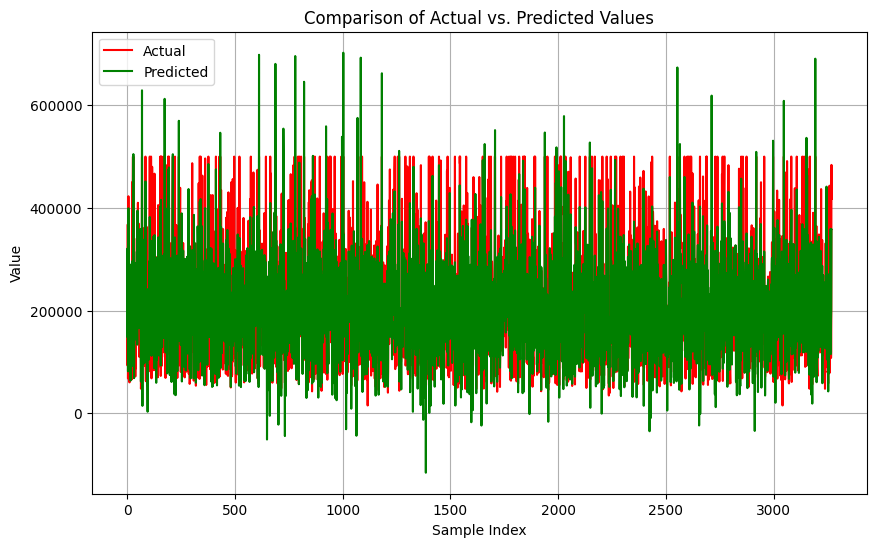

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

x_values = np.arange(len(y_test))

# Create a comparison plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_test, label='Actual', color = 'r')
plt.plot(x_values, y_pred, label='Predicted', color = 'g')
plt.title("Comparison of Actual vs. Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Predicting the R2 score of the model chosen

In [ ]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score

0.6711352953637173

"Thank you for your interest in continuing to explore this topic. Your curiosity and dedication to learning are truly appreciated. Let's dive deeper and discover more together!"

Happy Learning!!

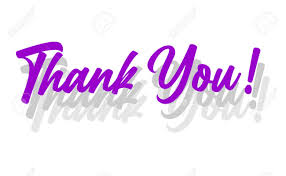